# Enter Student Name & ID

In [1]:
student_id =   400109265 #@param {type:"integer"}
student_name = "Yahya Tehrani" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400109265
your name: Yahya Tehrani


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [4]:
import numpy as np

In [21]:
def myPCA(X, num_components):
    #
    # Complete
    #
    X_centered = X - np.mean(X, axis=0)
    
    covariance_matrix = np.cov(X_centered, rowvar=False)
    
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    projection_matrix = sorted_eigenvectors[:, :num_components]
    
    X_reduced = np.dot(X_centered, projection_matrix)
    
    return X_reduced, sorted_eigenvalues[:num_components], projection_matrix

### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [22]:
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

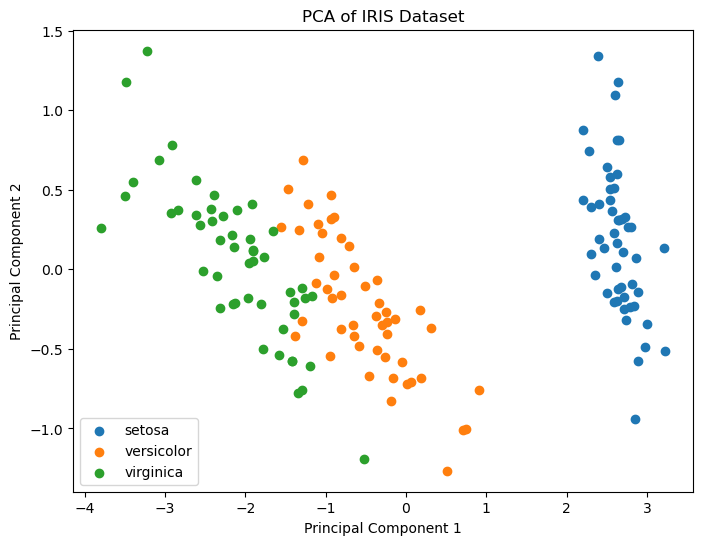

In [23]:
# myPCA on IRIS 
iris = load_iris()
X = iris.data
y = iris.target

X_reduced, eigenvalues, projection_matrix = myPCA(X, 2)

plt.figure(figsize=(8, 6))
for target in np.unique(y):
    plt.scatter(X_reduced[y == target, 0], X_reduced[y == target, 1], label=iris.target_names[target])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS Dataset')
plt.legend()
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `

**Eigenfaces**:

Eigenfaces are a set of eigenvectors used in the computer vision problem of human face recognition. These eigenvectors are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of possible human faces. The concept of eigenfaces stems from the application of Principal Component Analysis (PCA) to face images.

**How Eigenfaces are Related to PCA**:

1. **Data Representation**:
   - Each face image is treated as a high-dimensional vector. For instance, an image of size \(m \times n\) pixels can be represented as a vector in \(m \times n\) dimensions.
   
2. **Data Centering**:
   - Before applying PCA, the data is centered by subtracting the mean face (average of all face images) from each face image.

3. **Covariance Matrix**:
   - PCA involves calculating the covariance matrix of these centered vectors. This matrix captures the variance and covariance of the pixel intensities between different face images.

4. **Eigen Decomposition**:
   - Eigenfaces are the eigenvectors of this covariance matrix. In PCA terms, these eigenvectors are the principal components. They capture the directions of maximum variance in the dataset.
   - The corresponding eigenvalues represent the amount of variance captured by each principal component (eigenface).

5. **Dimensionality Reduction**:
   - Typically, only the top \(k\) eigenfaces (those with the highest eigenvalues) are retained. This reduces the dimensionality of the face data while preserving as much variance as possible. The choice of \(k\) depends on the desired balance between dimensionality and the amount of variance captured.

6. **Face Reconstruction**:
   - Any face image can be approximated by a linear combination of the top \(k\) eigenfaces. This means that faces can be efficiently represented and reconstructed using these eigenfaces.

7. **Recognition and Classification**:
   - In face recognition tasks, a new face image can be projected onto the eigenface space (spanned by the top \(k\) eigenfaces) to obtain its principal components (eigenface coefficients). These coefficients can then be used to compare the new face with faces in the database for identification or verification purposes.

### Summary

Eigenfaces are essentially the principal components obtained by applying PCA to a set of face images. They form a basis set for representing face images in a lower-dimensional space while preserving most of the significant features (variance) of the original images. This method helps in both reducing the dimensionality of the data and in efficient recognition and reconstruction of faces.



### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [24]:
!pip install opencv-python

In [25]:
import os
import zipfile
import cv2
import numpy as np

# Function to extract the zip file
def extract_zip(zip_path, extract_to='.'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Function to read images and create train/test splits
def load_faces_dataset(dataset_path):
    X_train, y_train, X_test, y_test = [], [], [], []
    
    for person_id in range(1, 41):
        person_path = os.path.join(dataset_path, f's{person_id}')
        
        for img_id in range(1, 11):
            img_path = os.path.join(person_path, f'{img_id}.bmp')
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img_flat = img.flatten()
            
            if img_id <= 5:
                X_train.append(img_flat)
                y_train.append(person_id)
            else:
                X_test.append(img_flat)
                y_test.append(person_id)
    
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    return X_train, y_train, X_test, y_test

# Path to the zip file
zip_path = 'FacesDataset1.zip'

# Extract the zip file
extract_zip(zip_path, 'FacesDataset')

# Load the dataset from the extracted folder
dataset_path = os.path.join('FacesDataset', 'ORL')
X_train, y_train, X_test, y_test = load_faces_dataset(dataset_path)

print('Training data shape:', X_train.shape)
print('Training labels shape:', y_train.shape)
print('Testing data shape:', X_test.shape)
print('Testing labels shape:', y_test.shape)


Training data shape: (200, 2304)
Training labels shape: (200,)
Testing data shape: (200, 2304)
Testing labels shape: (200,)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

Shape of reduced data: (400, 50)


C:\Users\Asus\AppData\Local\Temp\ipykernel_23328\2728901634.py:76: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap='tab10', s=10)


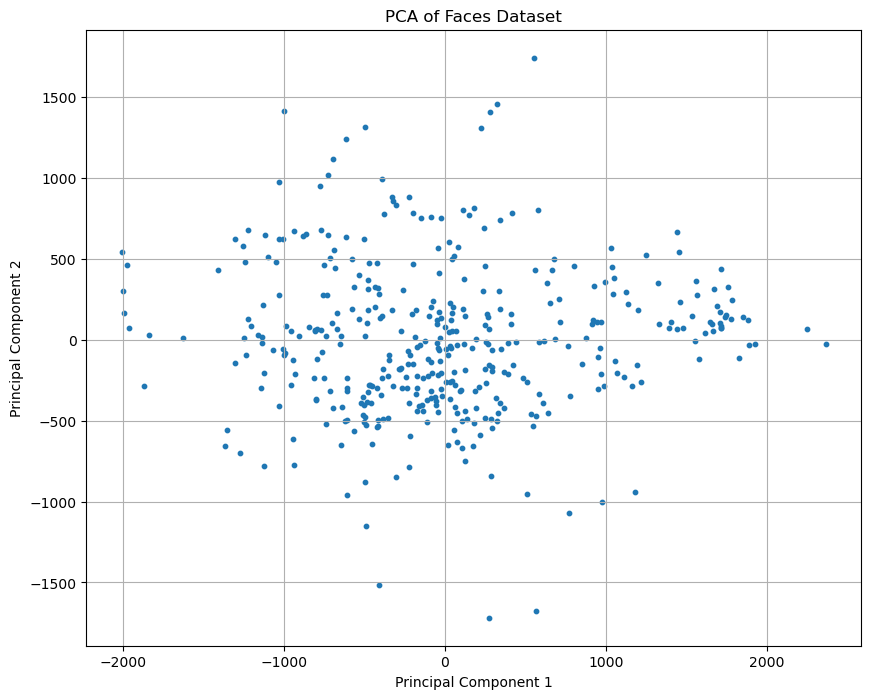

In [27]:
import os
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to extract the zip file
def extract_zip(zip_path, extract_to='.'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Define the myPCA function
def myPCA(X, num_components):
    # Step 1: Center the data by subtracting the mean of each feature
    X_centered = X - np.mean(X, axis=0)
    
    # Step 2: Compute the covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)
    
    # Step 3: Perform eigen decomposition of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Step 4: Sort the eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 5: Select the top 'num_components' eigenvectors
    projection_matrix = sorted_eigenvectors[:, :num_components]
    
    # Step 6: Transform the data using the projection matrix
    X_reduced = np.dot(X_centered, projection_matrix)
    
    return X_reduced, projection_matrix

# Function to load faces dataset from extracted folder
def load_faces_dataset(dataset_path):
    X = []
    for person_id in range(1, 41):
        person_path = os.path.join(dataset_path, f's{person_id}')
        
        for img_id in range(1, 11):
            img_path = os.path.join(person_path, f'{img_id}.bmp')
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img_flat = img.flatten()
            X.append(img_flat)
    
    X = np.array(X)
    return X

# Path to the zip file
zip_path = 'FacesDataset1.zip'

# Extract the zip file to a folder named 'FacesDataset'
extract_zip(zip_path, 'FacesDataset')

# Path to the extracted dataset folder
dataset_path = os.path.join('FacesDataset', 'ORL')

# Load the faces dataset from the extracted folder
X_faces = load_faces_dataset(dataset_path)

# Define the number of principal components
num_components = 50  # choose a number between 40 and 50

# Perform PCA to reduce dimensionality using myPCA function
X_reduced, projection_matrix = myPCA(X_faces, num_components)

# Print the shape of reduced data
print('Shape of reduced data:', X_reduced.shape)

# Plotting code for visualization
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], cmap='tab10', s=10)
plt.title('PCA of Faces Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [29]:
import numpy as np
import os
import zipfile
import cv2
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Function to extract the zip file
def extract_zip(zip_path, extract_to='.'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Function to load faces dataset from extracted folder
def load_faces_dataset(dataset_path):
    X = []
    y = []
    for person_id in range(1, 41):
        person_path = os.path.join(dataset_path, f's{person_id}')
        
        for img_id in range(1, 11):
            img_path = os.path.join(person_path, f'{img_id}.bmp')
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img_flat = img.flatten()
            X.append(img_flat)
            y.append(person_id)
    
    X = np.array(X)
    y = np.array(y)
    return X, y

# Path to the zip file
zip_path = 'FacesDataset1.zip'

# Extract the zip file to a folder named 'FacesDataset'
extract_zip(zip_path, 'FacesDataset')

# Path to the extracted dataset folder
dataset_path = os.path.join('FacesDataset', 'ORL')

# Load the faces dataset from the extracted folder
X_faces, y_faces = load_faces_dataset(dataset_path)

# Define the number of principal components
num_components = 50  # choose a number between 40 and 50

# Step 1: Perform PCA to reduce dimensionality
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_faces)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_faces, test_size=0.5, random_state=42)

# Step 3: Train LDA classifier on the PCA-transformed data
lda = LDA()
lda.fit(X_train, y_train)

# Step 4: Predict on the test set and compute accuracy
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of LDA classifier on PCA-transformed data: {accuracy:.2f}')


Accuracy of LDA classifier on PCA-transformed data: 0.95


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


PCA components: 100, Accuracy: 0.94
PCA components: 95, Accuracy: 0.95
PCA components: 90, Accuracy: 0.95
PCA components: 85, Accuracy: 0.95
PCA components: 80, Accuracy: 0.97
PCA components: 75, Accuracy: 0.96
PCA components: 70, Accuracy: 0.96
PCA components: 65, Accuracy: 0.94
PCA components: 60, Accuracy: 0.96
PCA components: 55, Accuracy: 0.95
PCA components: 50, Accuracy: 0.95
PCA components: 45, Accuracy: 0.95
PCA components: 40, Accuracy: 0.97


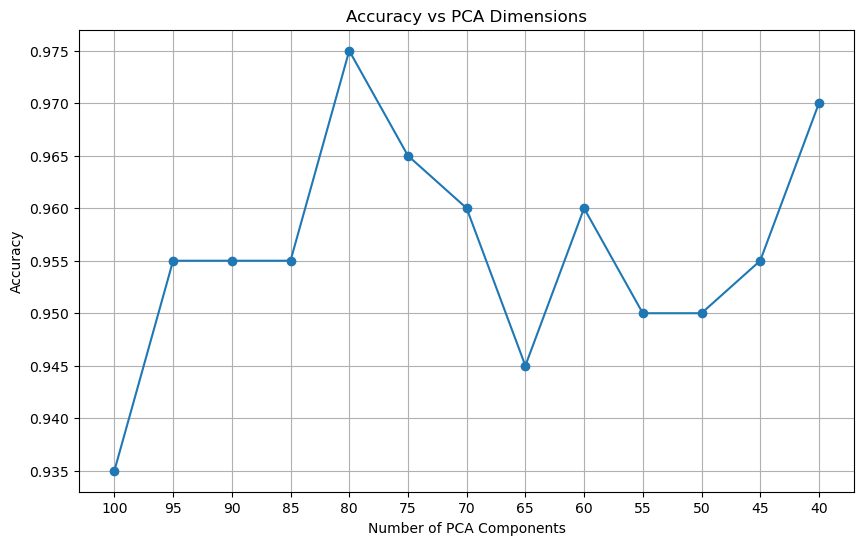

Best accuracy achieved: 0.97 with 80 PCA components


In [30]:
import numpy as np
import os
import zipfile
import cv2
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Function to extract the zip file
def extract_zip(zip_path, extract_to='.'):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Function to load faces dataset from extracted folder
def load_faces_dataset(dataset_path):
    X = []
    y = []
    for person_id in range(1, 41):
        person_path = os.path.join(dataset_path, f's{person_id}')
        
        for img_id in range(1, 11):
            img_path = os.path.join(person_path, f'{img_id}.bmp')
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img_flat = img.flatten()
            X.append(img_flat)
            y.append(person_id)
    
    X = np.array(X)
    y = np.array(y)
    return X, y

# Path to the zip file
zip_path = 'FacesDataset1.zip'

# Extract the zip file to a folder named 'FacesDataset'
extract_zip(zip_path, 'FacesDataset')

# Path to the extracted dataset folder
dataset_path = os.path.join('FacesDataset', 'ORL')

# Load the faces dataset from the extracted folder
X_faces, y_faces = load_faces_dataset(dataset_path)

# Define the range of PCA dimensions to explore
pca_dimensions = range(100, 39, -5)

# Lists to store results
dimension_values = []
accuracy_values = []

# Iterate over PCA dimensions
for num_components in pca_dimensions:
    # Step 1: Perform PCA to reduce dimensionality
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X_faces)

    # Step 2: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y_faces, test_size=0.5, random_state=42)

    # Step 3: Train LDA classifier on the PCA-transformed data
    lda = LDA()
    lda.fit(X_train, y_train)

    # Step 4: Predict on the test set and compute accuracy
    y_pred = lda.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Store dimension and accuracy values
    dimension_values.append(num_components)
    accuracy_values.append(accuracy)

    print(f'PCA components: {num_components}, Accuracy: {accuracy:.2f}')

# Plotting accuracy vs PCA dimensions
plt.figure(figsize=(10, 6))
plt.plot(dimension_values, accuracy_values, marker='o')
plt.title('Accuracy vs PCA Dimensions')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(dimension_values)
plt.gca().invert_xaxis()  # Invert x-axis to show higher PCA dimensions on the left
plt.show()

# Analysis and discussion of results
max_accuracy = max(accuracy_values)
best_dimension = dimension_values[accuracy_values.index(max_accuracy)]
print(f'Best accuracy achieved: {max_accuracy:.2f} with {best_dimension} PCA components')

# Discuss how many features (PCA components) are sufficient for the dataset
# Based on the plot and analysis, determine the optimal number of PCA components
